## Método

In [ ]:
from sympy.abc import x,y
from sympy import *
import numpy as np
import math as m
import time

class Gradient():
    def gradient(self,f,xs):
        grad=[]
        for i in range(len(xs)):
            grad.append(diff(f,xs[i]))
        return grad

    def hessian(self,f,xs):
        hess=[]
        for i in range(len(xs)):
            aux=[]
            for j in range(len(xs)):
                aux.append(diff(diff(f,xs[i]),xs[j]))
            hess.append(aux)
        return hess

    def substitution(self,array,xs,point,type):
        if type==2:
            #print("es hessiana")
            for i in range(len(array)):
                for j in range(len(array)):
                    for k in range(len(xs)):
                        array[i][j]=array[i][j].subs(xs[k],point[k])
            return array
        elif type==1:
            #print("es vector")
            for i in range(len(array)):
                for j in range(len(xs)):
                    array[i]=array[i].subs(xs[j],point[j])
            return array

    def mult(self,array,var):
        res=[]
        for i in range(len(array)):
            res.append(array[i]*var)
        return res

    def producto(self,array1,array2):
      res=0
      for i in range(len(array1)):
        res+=array1[i]*array2[i]
      return res
    
    def suma(self,array1,array2):
        res=[]
        for i in range(len(array1)):
            res.append(array1[i]+array2[i])
        return res

    def norma(self,vector0,vector1):
        # Cálculo de error por definición de norma
        suma=0
        for i in range(len(vector0)):
            aux=(vector0[i]-vector1[i])**2
            suma=suma+aux
        return m.sqrt(suma) 

    def method(self,f,xs,initPoint):
        obj=Gradient()
        tol,maxIter,iter,eAbs=0.000001,9999,1,np.inf
        alpha=0.1

        while (iter<maxIter or eAbs>=tol):
            grad=obj.gradient(f,xs)
            #print("gradiente",grad)
            #grad=obj.mult(grad,-1) # -1 cuando se minimice
            x0=initPoint
            #print("x0",x0)
            s0=obj.substitution(grad,xs,x0,1)
            #print("s0",s0)

            numerador=obj.producto(s0,s0)
            hessiana=obj.hessian(f,xs)
            hessiana=obj.substitution(hessiana,xs,x0,2)
            denominador=obj.producto(np.array(s0)@np.array(hessiana),s0)
            lambda0=float(numerador/denominador)
            lambda0=alpha
            #print("lambda",lambda0)
            
            x1=obj.suma(x0,obj.mult(s0,lambda0))
            subsX1=obj.substitution(grad,xs,x1,1)
            zeros=np.zeros_like(subsX1)
            eAbs=obj.norma(subsX1,zeros)

            initPoint=x1
            #print("x1",x1,"iteracion:",iter)
            #print("eAbs",eAbs)
            iter+=1
            if (eAbs<tol):
              return x1, iter
            if (iter>maxIter):
              x="No se encontró mínimo"
              return x

        return x1, iter

def main():
  ### Función de 1 variable
  n=1 # Número de ecuaciones y variables
  xs=[] # Incógnitas
  for i in range(n):
      xs.append(symbols("x"+str(i+1)))

  start=time.time()
  f1=-xs[0]**2+2
  print("Función de 1 variable:",f1)

  initPoint1=[-2]
  objG=Gradient()
  aproximacion,iteraciones=objG.method(f1,xs,initPoint1)
  print("Aproximacion de punto máximo:\n",aproximacion,"\nIteraciones:\n",iteraciones)
  end=time.time()
  print("Tiempo de ejecución:",end-start)

  ### Función de 2 variables
  n=2 # Número de ecuaciones y variables
  xs=[] # Incógnitas
  for i in range(n):
      xs.append(symbols("x"+str(i+1)))

  start=time.time()
  f2=2*xs[0]*xs[1]+2*xs[0]-xs[0]**2-2*xs[1]**2
  print("Función de 2 variables:",f2)

  initPoint2=[2,0]
  objG=Gradient()
  aproximacion,iteraciones=objG.method(f2,xs,initPoint2)
  print("Aproximacion de punto máximo:\n",aproximacion,"\nIteraciones:\n",iteraciones)
  end=time.time()
  print("Tiempo de ejecución:",end-start)

  ### Función de 3 variables
  n=3 # Número de ecuaciones y variables
  xs=[] # Incógnitas
  for i in range(n):
      xs.append(symbols("x"+str(i+1)))

  start=time.time()
  f3=-xs[0]**2-xs[1]**2-xs[2]**2
  print("Función de 3 variables:",f3)

  initPoint3=[-10,10,5]
  objG=Gradient()
  aproximacion,iteraciones=objG.method(f3,xs,initPoint3)
  print("Aproximacion de punto máximo:\n",aproximacion,"\nIteraciones:\n",iteraciones)
  end=time.time()
  print("Tiempo de ejecución:",end-start)

  ### Función de 4 variables
  n=4 # Número de ecuaciones y variables
  xs=[] # Incógnitas
  for i in range(n):
      xs.append(symbols("x"+str(i+1)))

  start=time.time()
  f4=-xs[0]**2-xs[1]**2-xs[2]**2-xs[3]**2
  print("Función de 4 variables:",f4)

  initPoint4=[-10,10,5,-5]
  objG=Gradient()
  aproximacion,iteraciones=objG.method(f4,xs,initPoint4)
  print("Aproximacion de punto máximo:\n",aproximacion,"\nIteraciones:\n",iteraciones)
  end=time.time()
  print("Tiempo de ejecución:",end-start) 

if __name__=="__main__":
    main()

Función de 1 variable: 2 - x1**2
Aproximacion de punto máximo:
 [-3.29100911464241e-7] 
Iteraciones:
 71
Tiempo de ejecución: 0.10409426689147949
Función de 2 variables: -x1**2 + 2*x1*x2 + 2*x1 - 2*x2**2
Aproximacion de punto máximo:
 [1.99999902185602, 0.999999395473773] 
Iteraciones:
 165
Tiempo de ejecución: 0.9137070178985596
Función de 3 variables: -x1**2 - x2**2 - x3**2
Aproximacion de punto máximo:
 [-2.20855883097298e-7, 2.20855883097298e-7, 1.10427941548649e-7] 
Iteraciones:
 80
Tiempo de ejecución: 0.5687921047210693
Función de 4 variables: -x1**2 - x2**2 - x3**2 - x4**2
Aproximacion de punto máximo:
 [-2.20855883097298e-7, 2.20855883097298e-7, 1.10427941548649e-7, -1.10427941548649e-7] 
Iteraciones:
 80
Tiempo de ejecución: 0.9904646873474121


Comparación de tiempos

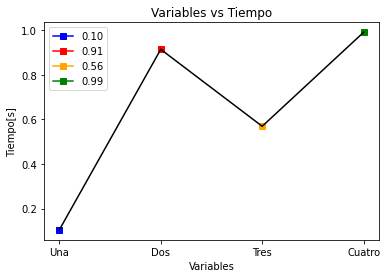

In [159]:
import matplotlib.pyplot as plt

vars=["Una","Dos","Tres","Cuatro"]
times=[0.10409426689147949,0.9137070178985596,0.5687921047210693,0.9904646873474121]
iters=[71,165,80,80]
colors=["blue","red","orange","green"]
for i in range(len(colors)):
  plt.plot(vars[i],times[i],color=colors[i],marker="s")
plt.plot(vars,times,color="black")
plt.xlabel("Variables")
plt.ylabel("Tiempo[s]")
plt.title("Variables vs Tiempo")
plt.legend(["0.10","0.91","0.56","0.99"])
plt.savefig("ComparacionTiempos.png",dpi=400)

Graficación de funciones (1 y 2 variables)

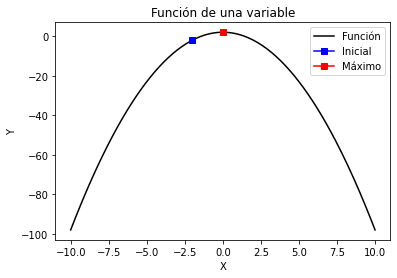

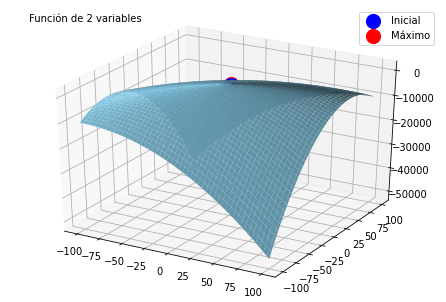

In [158]:
import matplotlib.pyplot as plt
from sympy.abc import x
from sympy import *
import sympy
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

class Graph():
  def plotLine(self,func,a,b):
    X=np.arange(a,b+0.1,0.1)
    Y=np.zeros_like(X)

    for i in range(len(X)):
      Y[i]=func.subs(x,X[i])

    plt.plot(X,Y,color="black")


n=2 # Número de ecuaciones y variables
xs=[] # Incógnitas
for i in range(n):
    xs.append(symbols("x"+str(i+1)))
## Función de 1 variable
f1=-x**2+2
initPoint1=[-2]
maxPoint1=[-3.29100911464241e-7] 
points=[initPoint1[0],maxPoint1[0]]
yPoints=[f1.subs(x,initPoint1[0]),f1.subs(x,maxPoint1[0])]

obj=Graph()
obj.plotLine(f1,-10,10)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Función de una variable")
for i in range(len(points)):
  plt.plot(points[i],yPoints[i],color=colors[i],marker="s")
plt.legend(["Función","Inicial","Máximo"])
plt.savefig("Variable1.png",dpi=400)

## Función de 2 variables
fig=plt.figure()
ax=Axes3D(fig)
x=np.linspace(-100,100,100)
y=np.linspace(-100,100,100)
X,Y=np.meshgrid(x,y)

def z(x,y):
  return 2*x*y+2*x-x**2-2*y**2

ax.plot_surface(X,Y,z(X,Y),color="skyblue")
ax.text2D(0.05, 0.95, "Función de 2 variables", transform=ax.transAxes)
f2=2*x*y+2*x-x**2-2*y**2
initPoint2=[2,0]
ax.scatter(initPoint2[0],initPoint2[1],label="Inicial",color="blue",s=200)
ax.scatter(maxPoint2[0],maxPoint2[1],label="Máximo",color="red",s=200)
ax.legend()
maxPoint2=[1.99999902185602,0.999999395473773] 
plt.savefig("Variable2.png",dpi=400)